In [88]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.fftpack as fft
#%matplotlib 

#### Punto 1

In [89]:
def create_gauss_filter(h, w, k_size=5, sigma=5):
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * np.exp(-((x - (k_size-1)/2)**2 + (y - (k_size-1)/2)**2) / (2 * sigma**2)),
        (k_size, k_size)
    )
    #print(kernel)
    kernel /= np.sum(kernel)
    center_x, center_y = h // 2, w // 2
    spatial_filter = np.zeros((h, w))
    spatial_filter[center_x - k_size // 2:center_x + k_size // 2 + 1, center_y - k_size // 2:center_y + k_size // 2 + 1] = kernel
    frequency_filter = np.fft.fft2(spatial_filter)
    return spatial_filter, frequency_filter



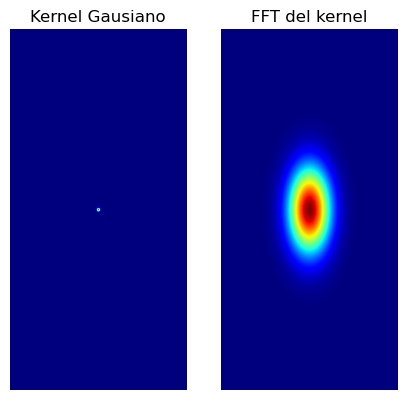

In [90]:
img = cv.imread('./material/fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
h, w = img.shape
k_size=15
sigma=2
kernel, kernel_tf = create_gauss_filter(h, w, k_size=k_size, sigma=sigma)
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')


k_size=15 - sigma=2


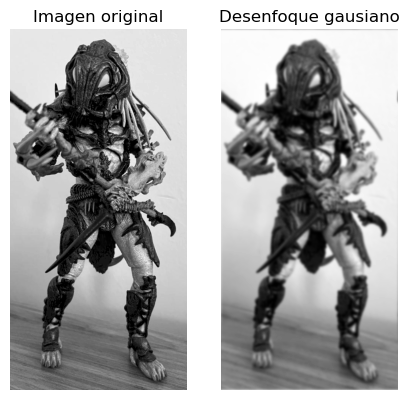

In [91]:
img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_tf
img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Imagen original')

plt.subplot(1,2,2)
plt.imshow(img_gauss, cmap='gray')
plt.axis('off')
plt.title('Desenfoque gausiano')
print(f'k_size={k_size} - sigma={sigma}')

Desenfoque Gaussiano


(-0.5, 340.5, 697.5, -0.5)

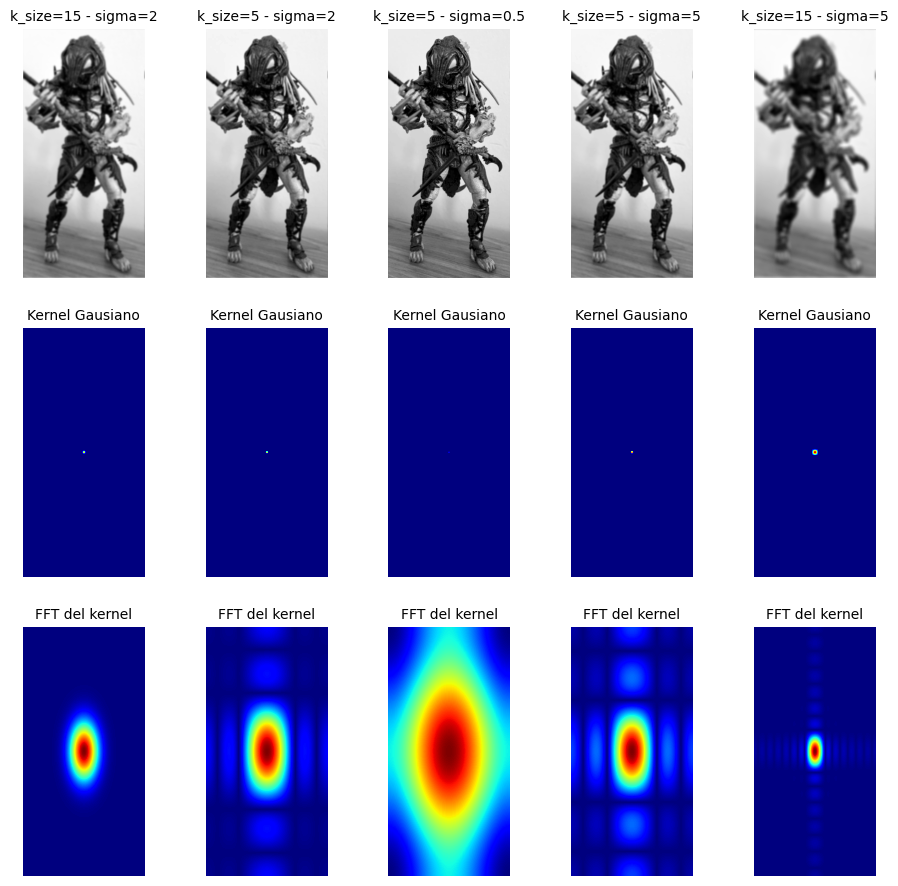

In [92]:
plt.figure(figsize=(11,11))

plt.subplot(3,5,1)
plt.imshow(img_gauss, cmap='gray')
plt.axis('off')
plt.title(f"k_size={k_size} - sigma={sigma}", fontsize=10)


plt.subplot(3,5,6)
plt.title("Kernel Gausiano", fontsize=10)
plt.imshow(kernel, cmap='jet')
plt.axis('off')

plt.subplot(3,5,11)
plt.title("FFT del kernel", fontsize=10)
plt.imshow(np.abs(tf_shifted), cmap='jet')
plt.axis('off')

##############
k_size=5
sigma=2

kernel2, kernel_tf2 = create_gauss_filter(h, w, k_size=k_size, sigma=sigma)
img_fft2 = np.fft.fft2(img)
filtered2 = img_fft2 * kernel_tf2

img_gauss2 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered2)))

plt.subplot(3,5,2)
plt.imshow(img_gauss2, cmap='gray')
plt.axis('off')
plt.title(f"k_size={k_size} - sigma={sigma}", fontsize=10)



plt.subplot(3,5,7)
plt.title("Kernel Gausiano", fontsize=10)
plt.imshow(kernel2, cmap='jet')
plt.axis('off')

tf_shifted2 = np.fft.fftshift(kernel_tf2)
plt.subplot(3,5,12)
plt.title("FFT del kernel", fontsize=10)
plt.imshow(np.abs(tf_shifted2), cmap='jet')
plt.axis('off')


##############
k_size=5
sigma=0.5

kernel3, kernel_tf3 = create_gauss_filter(h, w, k_size=k_size, sigma=sigma)
img_fft3 = np.fft.fft2(img)
filtered3 = img_fft3 * kernel_tf3
img_gauss3 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered3)))

plt.subplot(3,5,3)
plt.imshow(img_gauss3, cmap='gray')
plt.axis('off')
plt.title(f"k_size={k_size} - sigma={sigma}", fontsize=10)

plt.subplot(3,5,8)
plt.title("Kernel Gausiano", fontsize=10)
plt.imshow(kernel3, cmap='jet')
plt.axis('off')

tf_shifted3 = np.fft.fftshift(kernel_tf3)
plt.subplot(3,5,13)
plt.title("FFT del kernel", fontsize=10)
plt.imshow(np.abs(tf_shifted3), cmap='jet')
plt.axis('off')

##############
k_size=5
sigma=5

kernel4, kernel_tf4 = create_gauss_filter(h, w, k_size=k_size, sigma=sigma)
img_fft4 = np.fft.fft2(img)
filtered4 = img_fft4 * kernel_tf4
img_gauss4 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered4)))

plt.subplot(3,5,4)
plt.imshow(img_gauss4, cmap='gray')
plt.axis('off')
plt.title(f"k_size={k_size} - sigma={sigma}", fontsize=10)

plt.subplot(3,5,9)
plt.title("Kernel Gausiano", fontsize=10)
plt.imshow(kernel4, cmap='jet')
plt.axis('off')

tf_shifted4 = np.fft.fftshift(kernel_tf4)
plt.subplot(3,5,14)
plt.title("FFT del kernel", fontsize=10)
plt.imshow(np.abs(tf_shifted4), cmap='jet')
plt.axis('off')

##############
k_size=15
sigma=5

kernel5, kernel_tf5 = create_gauss_filter(h, w, k_size=k_size, sigma=sigma)
img_fft5 = np.fft.fft2(img)
filtered5 = img_fft5 * kernel_tf5

img_gauss5 = np.fft.ifftshift(np.real(np.fft.ifft2(filtered5)))
print('Desenfoque Gaussiano')
plt.subplot(3,5,5)
plt.imshow(img_gauss5, cmap='gray')
plt.axis('off')
plt.title(f"k_size={k_size} - sigma={sigma}", fontsize=10)
plt.subplots_adjust(wspace=0.5)

plt.subplot(3,5,10)
plt.title("Kernel Gausiano", fontsize=10)
plt.imshow(kernel5, cmap='jet')
plt.axis('off')

tf_shifted5 = np.fft.fftshift(kernel_tf5)
plt.subplot(3,5,15)
plt.title("FFT del kernel", fontsize=10)
plt.imshow(np.abs(tf_shifted5), cmap='jet')
plt.axis('off')


k_size=7 - sigma=2


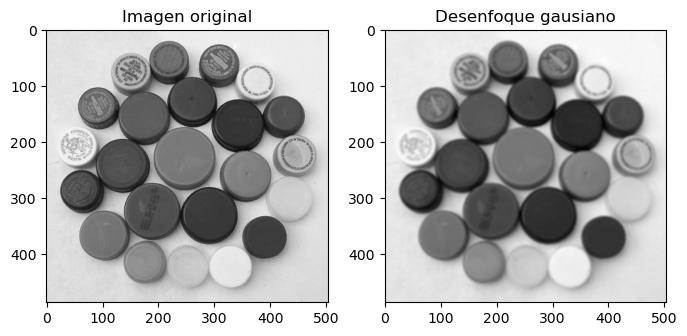

In [93]:
k_size=7
sigma=2

img2 = cv.imread('./material/tapitas.jpg', cv.IMREAD_GRAYSCALE)
h, w = img2.shape
kernel, kernel_tf = create_gauss_filter(h, w, k_size=k_size, sigma=sigma)
img_fft = np.fft.fft2(img2)
filtered = img_fft * kernel_tf
img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img2, cmap='gray')
plt.title('Imagen original')

plt.subplot(1,2,2)
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')
print(f'k_size={k_size} - sigma={sigma}')

#### Punto 2
Algorithm for image quality measure  
Input: Image I of size M×N.  
Output: Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure  
Step 1: Compute F which is the Fourier Transform representation of image I  
Step 2: Find Fc which is obtained by shifting the origin of F to centre.  
Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I.  
Step 4: Calculate M = max (AF) where M is the maximum value of the frequency component in F.  
Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000.  
Step 6: Calculate Image Quality measure (FM) from equation (1).  
Image Quality Measure (FM) = $T_{\text{H}}$ / MxN

In [94]:
def frequency_domain_blur_measure(image):
    F = np.fft.fft2(image)
    Fc = np.fft.fftshift(F)
    AF = np.abs(Fc)
    M = np.max(AF)
    thres = M / 1000
    TH = np.sum(AF > thres)
    FM = TH / (image.shape[0] * image.shape[1])
    return FM


resultado filtrado espacial: 0.009684332322936019
resultado filtrado espectral: 0.009700629053811805


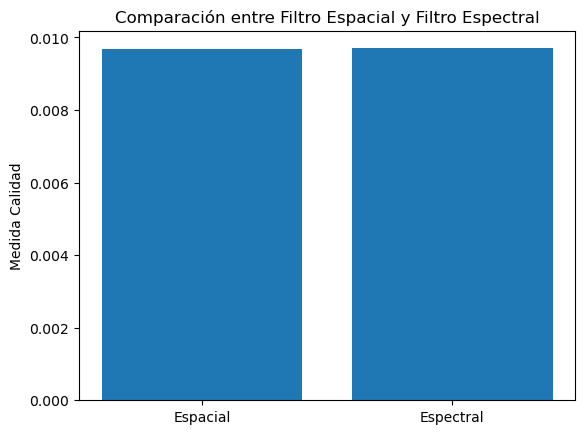

In [95]:
filtered_image = cv.filter2D(img2, -1, kernel)
result_espatial=frequency_domain_blur_measure(filtered_image)
print(f'resultado filtrado espacial: {result_espatial}')
result_spectral=frequency_domain_blur_measure(img_gauss)
print(f'resultado filtrado espectral: {result_spectral}')

labels = ['Espacial', 'Espectral']
values = [result_espatial, result_spectral]

plt.bar(labels, values)
plt.ylabel('Medida Calidad')
plt.title('Comparación entre Filtro Espacial y Filtro Espectral')
plt.show()

k_size:7 - sigma:2


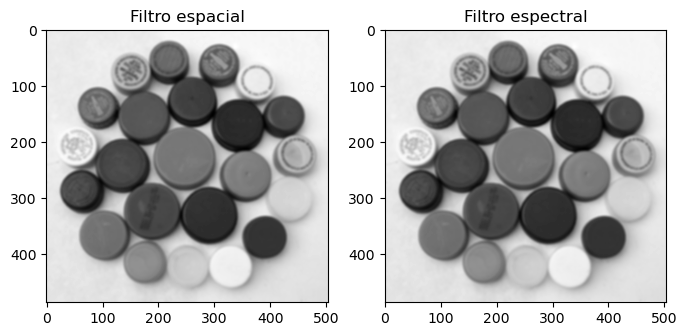

In [96]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtro espacial')

plt.subplot(1,2,2)
plt.imshow(img_gauss, cmap='gray')
plt.title('Filtro espectral')

print(f'k_size:{k_size} - sigma:{sigma}')

#### Punto 3  
A.28. Histogram entropy (STA7)  
Since a focused image is expected to have a higher information
content, the entropy and range of the image histogram can be
used to compute the focus measure. The histogram entropy
operator is defined as [4,7,8,59,62,70]  
$ \Phi = - \sum_{k=1}^{L} P_k log(P_k)$  
where $P_k$ is the relative frequency of the k-th gray-level.
In order to compute a focus value for a pixel at coordinates (x, y),
the image histogram used in (A.36) is obtained from the gray-level
values within $\Omega(x,y)$.  
  
 La entropía se utiliza como una medida estadística de la aleatoriedad o desorden en la distribución de niveles de gris en una imagen, y esta propiedad se puede relacionar con la textura de la imagen. Una imagen con una distribución de niveles de gris más uniforme tendrá una entropía más alta, indicando mayor aleatoriedad o variabilidad en la textura. Por otro lado, una imagen con una distribución de niveles de gris más concentrada tendrá una entropía más baja, indicando menor variabilidad y mayor previsibilidad en la textura.

In [97]:
from scipy.stats import entropy
from skimage import exposure
def shannon_entropy(p):
    return -np.sum(p * np.log2(p))

def histogram_entropy(image, region_size=15, epsilon=1e-10):
    x, y = np.indices(image.shape)
    entropies = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = image[max(0, i - region_size // 2):min(image.shape[0], i + region_size // 2 + 1),
                           max(0, j - region_size // 2):min(image.shape[1], j + region_size // 2 + 1)]
            hist, _ = np.histogram(region, bins=256, range=(0, 256), density=True)
            hist += epsilon  # para evitar ceros en el histograma
            entropies.append(shannon_entropy(hist))
    return np.array(entropies).reshape(image.shape)


In [98]:
entropies = histogram_entropy(img2)
print(entropies)
result_entropia = frequency_domain_blur_measure(entropies)
print(f'\nfrequency_domain_blur_measure(entropies):{result_entropia} ')

[[2.5231975  2.63038183 2.70539853 ... 1.94989991 1.94105971 1.74900006]
 [2.7032374  2.78812406 2.84232319 ... 1.89869517 1.90044591 1.6758229 ]
 [2.78207536 2.85675513 2.89836621 ... 1.95506578 1.95591412 1.67514408]
 ...
 [3.0296367  2.99685189 2.98504268 ... 1.95090766 2.00079294 1.98536424]
 [2.98822862 2.96437326 2.95811899 ... 1.97474098 2.02957946 2.02113082]
 [2.97360456 2.95040382 2.91590606 ... 1.9772819  2.04142515 2.04163176]]

frequency_domain_blur_measure(entropies):0.0071583390371891395 


Text(0.5, 1.0, 'Entropía')

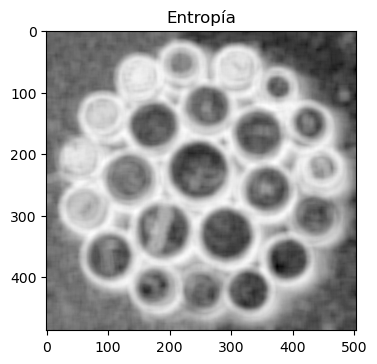

In [99]:
plt.figure(figsize=(4,4))
plt.imshow(entropies, cmap='gray')
plt.title('Entropía')

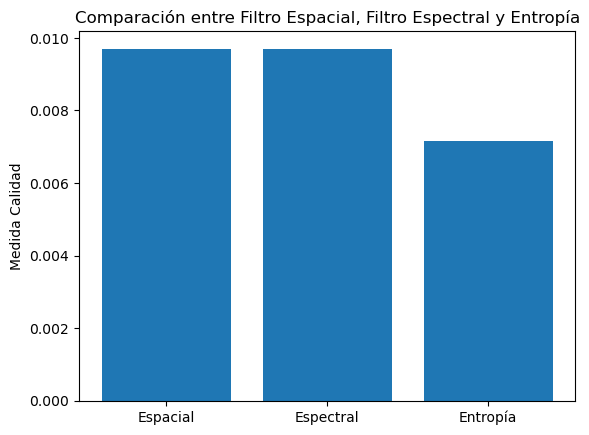

In [100]:
labels = ['Espacial', 'Espectral','Entropía']
values = [result_espatial, result_spectral, result_entropia ]

plt.bar(labels, values)
plt.ylabel('Medida Calidad')
plt.title('Comparación entre Filtro Espacial, Filtro Espectral y Entropía')
plt.show()

### Conclusión:  
Se observa menor nitidez al usar el algoritmo de entropía.